In [1]:
import pandas as pd
import fnmatch
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("final_dataset.csv").drop("Unnamed: 0", axis=1)
df

,region,date,crime_count,snow_count
0,Jämtlands län,1995-01-01,1.0,11.800000
1,Jämtlands län,1995-03-01,2.0,11.480000
2,Jämtlands län,1995-11-01,2.0,4.842105
3,Jämtlands län,1996-12-01,2.0,13.800000
4,Norrbottens län,1995-12-01,4.0,9.818182
...,...,...,...,...
2460,Östergötlands län,2008-03-01,40.0,9.400000
2461,Östergötlands län,2010-01-01,38.0,29.500000
2462,Östergötlands län,2010-03-01,38.0,24.941176
2463,Östergötlands län,2012-12-01,38.0,24.800000


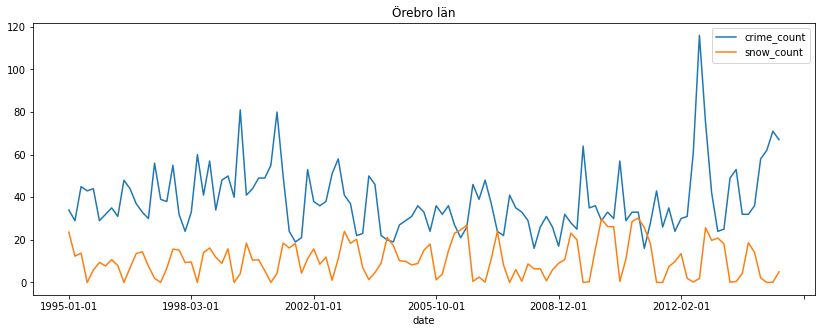

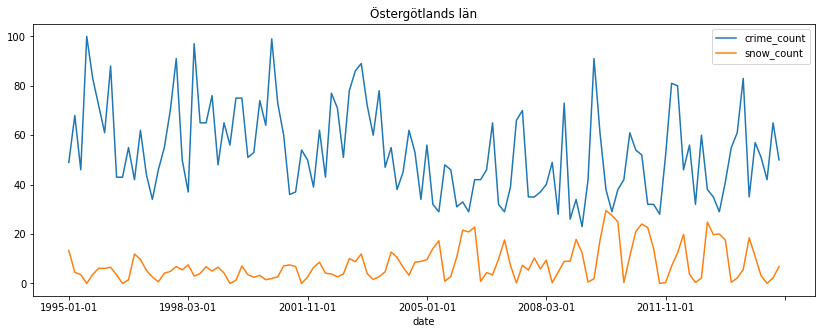

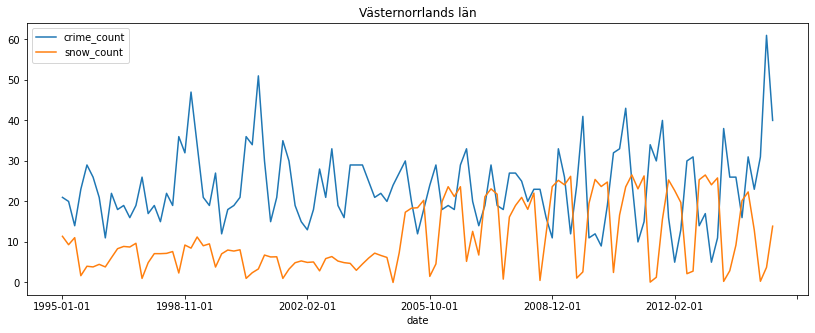

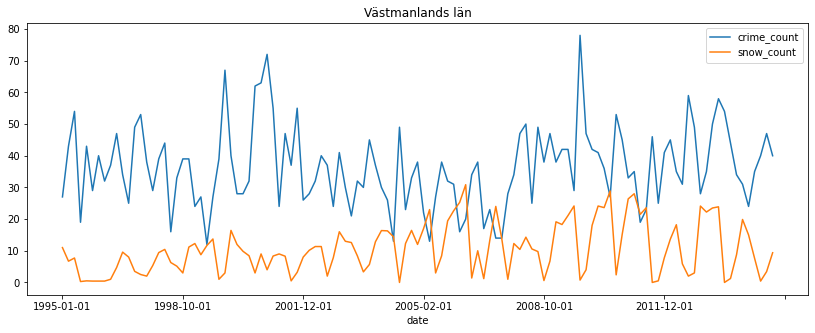

In [4]:
interesting_regions = ["Örebro län", "Östergötlands län", "Västernorrlands län", "Västmanlands län"]

for reg in interesting_regions:
    one_region = df.query('region == "'+reg+'"').sort_values(by='date', ascending=True)
    one_region.plot(x="date", y=["crime_count", "snow_count"], kind="line", title=reg, figsize=(14,5))

#one_region = new_df.query('region == "Örebro län"').sort_values(by='date', ascending=True)
#one_region.plot(x="date", y=["crime_count", "snow_count"], kind="line", title="Örebro county", figsize=(14,5))

In [398]:
new_df.to_csv("fixed_dataset_050122.csv")

In [399]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [403]:
def calc_corr():
    regions = new_df["region"].unique()
    region_corr = {}
    for region in regions:
        one_region = new_df.query('region == "'+region+'"').sort_values(by='date', ascending=True)
        
        X = one_region["crime_count"].astype(float)
        Y = one_region["snow_count"]
        corr,_ = pearsonr(X, Y)
        region_corr[region] = corr
    return region_corr

In [429]:
corr_table = pd.DataFrame([calc_corr()], index=['correlation']).transpose().sort_values(by='correlation', ascending=True)
corr_table
corr_table

,correlation
Örebro län,-0.383609
Östergötlands län,-0.372252
Västernorrlands län,-0.356675
Västmanlands län,-0.333140
Uppsala län,-0.314354
Södermanlands län,-0.293025
Gävleborgs län,-0.289204
Dalarnas län,-0.278823
Blekinge län,-0.260624
Hallands län,-0.211412


In [387]:
#cov_mat = np.stack((X, Y), axis=0)

In [388]:
#np.cov(cov_mat)

-0.2788225797495508